Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 5 - Pré-Processamento de Dados - Parte 2

Nome: Wilson Castello Branco Neto

**Dataset**: Salary dataset based on country and race

Disponível em: https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race


**Parte 1** - Seleção de atributos por ordenação, com base em medidas de correlação e aspectos subjetivos (um atributo por vez)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mineração de Dados/Aula3/Salary_Data_Based_country_and_race.csv')
df.drop('Unnamed: 0',axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
li = df['Salary'].mean() - 2 * df['Salary'].std()
ls = df['Salary'].mean() + 2 * df['Salary'].std()
df = df[(df['Salary']>=li) & (df['Salary']<=ls)]
df = df[(df['Age'] - df['Years of Experience'])>=16]
df.loc[df['Education Level'] == 'phD', 'Education Level'] = 'PhD'
df.loc[df['Education Level'] == "Bachelor's Degree", 'Education Level'] = "Bachelor's"
df.loc[df['Education Level'] == "Master's Degree",'Education Level'] = "Master's"

df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,Junior Sales Representative,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,China,Chinese


Cálculo do coeficiente de correlação (pearson) entre todas as variáveis quantitativas e apresentação do mapa de calor.

Diagramas de dispersão para mostras as relações entre as variáveis quantitativas.

*   Tempo de Experiência e Salário.
*   Idade - Salário
*   Idade - Tempo de Experiência



Para varivéis qualitativas, é possível gerar histogramas de frequência para cada classe para analisar se há diferenças significativas entre os histogramas. Além disto, é possível gerar gráficos de barras com os valores médios e boxplots para analisar a variância dos valores em cada classe.

Análise do impacto do atributo **gênero** no atributo **salário**.


Código para contar e eliminar as linhas com gênero 'Other'.

Código para apresentar a tabela, o gráfico de barras e o box plot com o salário médio por gênero.

Código para apresentar o histograma de frequência do salário de cada gênero.


Análise do impacto do atributo **nível educacional** no atributo **salário**.

Código para apresentar a tabela, o gráfico de barras e o box plot com o salário médio por nível educacional.

Código para apresentar o histograma de frequência do salário por nível educacional.

Análise do impacto do atributo **país** no atributo **salário**.

Código para apresentar a tabela, o gráfico de barras e o box plot com o salário médio por país.

Código para apresentar o histograma de frequência do salário por país.

Criação de histogramas de frequência do atributo salário, separados por país para facilitar a visualização.

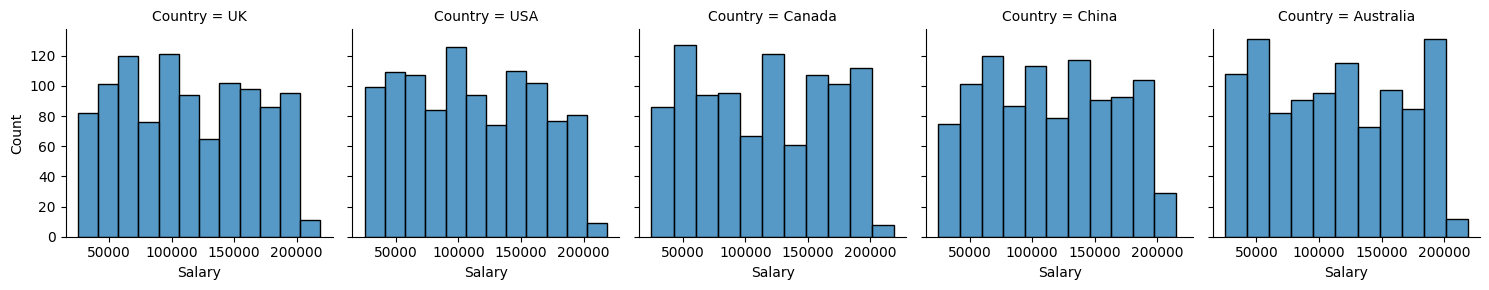

In [ ]:
grafico = sns.FacetGrid(df, col = "Country")
grafico.map(sns.histplot, "Salary")
plt.show ()

Análise do impacto do atributo **raça** no atributo **salário**.

Código para apresentar a tabela, o gráfico de barras e o box plot com o salário médio por raça.

Código para apresentar o histograma de frequência do salário por raça.

Criação de histogramas de frequência do atributo salário, separados por raça para facilitar a visualização.

Considerando os resultados apresentados, subjetivamente qual a ordem de importância dos atributos?

(Idade, Sexo, Nível Educacional, Função, Anos de Experiência, País e Raça).




**Parte 2** - Codificação dos dados e avaliação da importância de cada atributo por meio do ganho de informação

In [ ]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,Junior Sales Representative,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,China,Chinese


Mapeamento direto usando o **LabelEncoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2 = df.copy()

df2['Gender']=le.fit_transform(df2['Gender'])
df2['Education Level']=le.fit_transform(df2['Education Level'])
df2['Country']=le.fit_transform(df2['Country'])
df2['Job Title']=le.fit_transform(df2['Job Title'])
df2['Race']=le.fit_transform(df2['Race'])

#df2.drop(['Job Title','Age'],axis='columns',inplace = True)
X = df2.drop(['Salary'] ,axis='columns')
y = df2['Salary']
X.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,1,0,172,5.0,3,9
1,28.0,0,2,15,3.0,4,5
2,45.0,1,3,141,15.0,1,9
3,36.0,0,0,112,7.0,4,5
4,52.0,1,2,22,20.0,4,1
5,29.0,1,0,90,2.0,4,5
6,42.0,0,2,103,12.0,4,1
7,31.0,1,0,115,4.0,2,6
8,26.0,0,0,91,1.0,2,4
9,38.0,1,3,162,10.0,0,2


Treinamento da árvore de decisão e apresentação da "importância" de cada atributo após a codificação com o LabelEnconder.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(criterion='squared_error', max_depth=7, random_state=42)
modelo.fit(X, y)
np.set_printoptions(precision=3,suppress=True)
modelo.feature_importances_

array([0.041, 0.003, 0.013, 0.136, 0.807, 0.   , 0.   ])

Representação binária usando a função **get_dummies** do Pandas.

A biblioteca scikit-learn disponibiliza a classe OneHotEncoder que realiza a mesma tarefa. Embora possua algumas vantagens, o uso do OneHotEncoder é mais trabalhoso e não será apresentado neste notebook.

In [ ]:
df3 = df.copy()
df3.drop('Job Title',axis='columns', inplace=True)
df3 = pd.get_dummies(df3, columns = ['Gender','Education Level','Country','Race'])
X = df3.drop(['Salary'] ,axis='columns')
y = df3['Salary']
X.head(10)

,Age,Years of Experience,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD,Country_Australia,...,Race_African American,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,5.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28.0,3.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,45.0,15.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,36.0,7.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,52.0,20.0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,29.0,2.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,42.0,12.0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,31.0,4.0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,26.0,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,38.0,10.0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


Treinamento da árvore de decisão e apresentação da "importância" de cada atributo após a codificação com o get_dummies.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(criterion='squared_error', max_depth=23, random_state=42)
modelo.fit(X, y)
modelo.feature_importances_

array([0.088, 0.794, 0.009, 0.009, 0.   , 0.019, 0.018, 0.017, 0.011,
       0.003, 0.004, 0.002, 0.003, 0.003, 0.001, 0.004, 0.002, 0.001,
       0.002, 0.002, 0.002, 0.001, 0.001, 0.004])

In [ ]:
X = df2.drop(['Salary'] ,axis='columns')
y = df2['Salary']
X.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,1,0,172,5.0,3,9
1,28.0,0,2,15,3.0,4,5
2,45.0,1,3,141,15.0,1,9
3,36.0,0,0,112,7.0,4,5
4,52.0,1,2,22,20.0,4,1
5,29.0,1,0,90,2.0,4,5
6,42.0,0,2,103,12.0,4,1
7,31.0,1,0,115,4.0,2,6
8,26.0,0,0,91,1.0,2,4
9,38.0,1,3,162,10.0,0,2


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

seletor = SelectKBest(score_func=f_regression, k=4)
seletor.fit_transform(X,y)

print('Todos os campos')
print(X.columns)

print('Campos selecionados')
filter = seletor.get_support()
print(X.columns[filter])

Todos os campos
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Country', 'Race'],
      dtype='object')
Campos selecionados
Index(['Age', 'Gender', 'Education Level', 'Years of Experience'], dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

seletor = SelectKBest(score_func=f_regression, k=3)
seletor.fit_transform(X,y)

print('Todos os campos')
print(X.columns)

print('Campos selecionados')
filter = seletor.get_support()
print(X.columns[filter])


Todos os campos
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Country', 'Race'],
      dtype='object')
Campos selecionados
Index(['Age', 'Education Level', 'Years of Experience'], dtype='object')


Perceba que os resultados obtidos pela árvore de decisão e pelo método selectKBest diferem, enquanto a primeira atribui um alto grau de importância ao atributo Job Title, este mesmo atributo não é selecionado pelo selectKBest.


**Parte 3**

Análise do subconjunto

In [ ]:
X = df2.drop(['Salary'] ,axis='columns')
y = df2['Salary']
X.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
0,32.0,1,0,172,5.0,3,9
1,28.0,0,2,15,3.0,4,5
2,45.0,1,3,141,15.0,1,9
3,36.0,0,0,112,7.0,4,5
4,52.0,1,2,22,20.0,4,1
5,29.0,1,0,90,2.0,4,5
6,42.0,0,2,103,12.0,4,1
7,31.0,1,0,115,4.0,2,6
8,26.0,0,0,91,1.0,2,4
9,38.0,1,3,162,10.0,0,2


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

estimator =  DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0)
seletor = RFE(estimator, n_features_to_select=3, step=1)
seletor.fit(X, y)

print('Todos os campos')
print(X.columns)

print('Campos selecionados')
filter = seletor.get_support()
print(X.columns[filter])

print('Ranking')
print(seletor.ranking_)

Todos os campos
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Country', 'Race'],
      dtype='object')
Campos selecionados
Index(['Age', 'Job Title', 'Years of Experience'], dtype='object')
Ranking
[1 5 2 1 1 4 3]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

estimator =  DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=0)
seletor = RFE(estimator, n_features_to_select=4, step=1)
seletor.fit(X, y)

print('Todos os campos')
print(X.columns)

print('Campos selecionados')
filter = seletor.get_support()
print(X.columns[filter])

print('Ranking')
print(seletor.ranking_)

Todos os campos
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Country', 'Race'],
      dtype='object')
Campos selecionados
Index(['Age', 'Education Level', 'Job Title', 'Years of Experience'], dtype='object')
Ranking
[1 4 1 1 1 3 2]


**Parte 4**

Transformação de dados

In [ ]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,Junior Sales Representative,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,China,Chinese


Padronização - Capitalização de valores categóricos

In [ ]:
df['Country'] = df['Country'].str.upper()
df['Gender'] = df['Gender'].str.lower()
df['Job Title'] = df['Job Title'].str.capitalize()

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,male,Bachelor's,Software engineer,5.0,90000.0,UK,White
1,28.0,female,Master's,Data analyst,3.0,65000.0,USA,Hispanic
2,45.0,male,PhD,Senior manager,15.0,150000.0,CANADA,White
3,36.0,female,Bachelor's,Sales associate,7.0,60000.0,USA,Hispanic
4,52.0,male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6698,37.0,male,Bachelor's,Junior sales representative,6.0,75000.0,CANADA,Asian
6699,49.0,female,PhD,Director of marketing,20.0,200000.0,UK,Mixed
6700,32.0,male,High School,Sales associate,3.0,50000.0,AUSTRALIA,Australian
6701,30.0,female,Bachelor's,Financial manager,4.0,55000.0,CHINA,Chinese


**Normalização**

Método MinMax

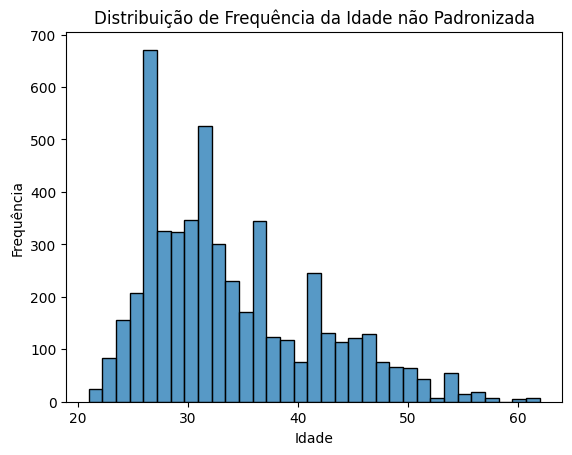

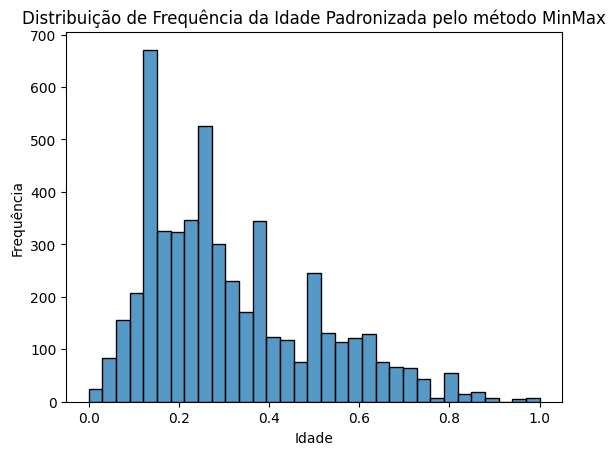

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#O parâmetro passado no construtor define os limites mínimos e máximos a serem
#usados, por meio de uma tupla. Se for deixado em branco, o valor padrão é (0, 1)

tranform = MinMaxScaler((0,1))
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df['Idade MinMax'] = tranform.fit_transform(df['Age'].values.reshape(-1,1))


sns.histplot(data=df, x ='Age')
plt.title('Distribuição de Frequência da Idade não Padronizada')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=df, x ='Idade MinMax')
plt.title('Distribuição de Frequência da Idade Padronizada pelo método MinMax')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Método Interquartil ou Robusto

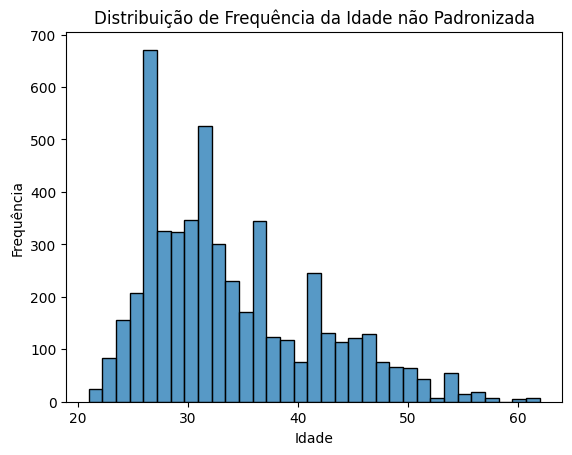

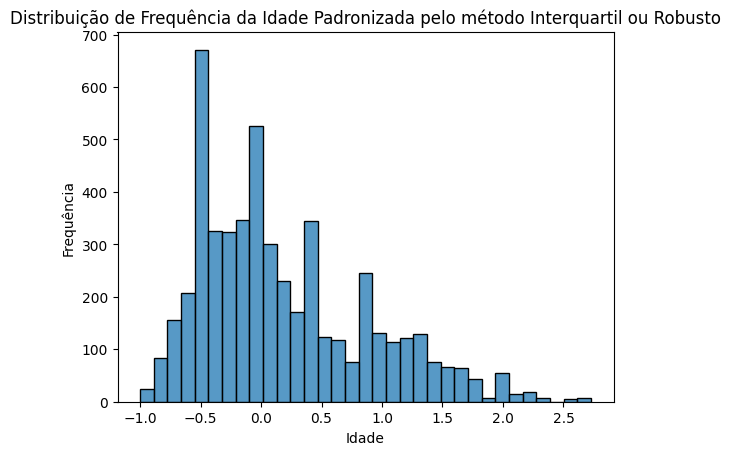

In [ ]:
from sklearn.preprocessing import RobustScaler

#O parâmetro passado no construtor define os limites mínimos e máximos a serem
#usados, por meio de uma tupla. Se for deixado em branco, o valor padrão é (0, 1)

tranform = RobustScaler()
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df['Idade Robust'] = tranform.fit_transform(df['Age'].values.reshape(-1,1))


sns.histplot(data=df, x ='Age')
plt.title('Distribuição de Frequência da Idade não Padronizada')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=df, x ='Idade Robust')
plt.title('Distribuição de Frequência da Idade Padronizada pelo método Interquartil ou Robusto')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Método z-score

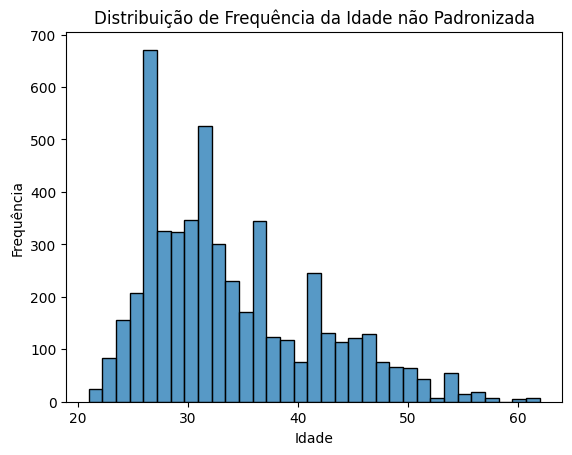

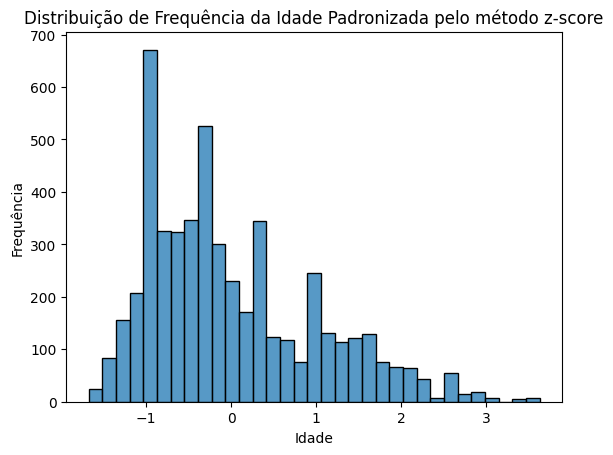

In [ ]:
from sklearn.preprocessing import StandardScaler

#O parâmetro passado no construtor define os limites mínimos e máximos a serem
#usados, por meio de uma tupla. Se for deixado em branco, o valor padrão é (0, 1)

tranform = StandardScaler()
# Transforma um vetor de uma dimensão em outro com várias linhas de uma única coluna
df['Idade z_score'] = tranform.fit_transform(df['Age'].values.reshape(-1,1))


sns.histplot(data=df, x ='Age')
plt.title('Distribuição de Frequência da Idade não Padronizada')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=df, x ='Idade z_score')
plt.title('Distribuição de Frequência da Idade Padronizada pelo método z-score')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

**Encaixotamento**

Caixas de mesma largura - cut

In [ ]:
df['Age_cut']  = pd.cut(df.Age, bins=3)

df[['Age','Age_cut']]

,Age,Age_cut
0,32.0,"(20.959, 34.667]"
1,28.0,"(20.959, 34.667]"
2,45.0,"(34.667, 48.333]"
3,36.0,"(34.667, 48.333]"
4,52.0,"(48.333, 62.0]"
...,...,...
6698,37.0,"(34.667, 48.333]"
6699,49.0,"(48.333, 62.0]"
6700,32.0,"(20.959, 34.667]"
6701,30.0,"(20.959, 34.667]"


In [ ]:
df['Age_cut_codigo']  = pd.cut(df.Age, bins=3,labels=False)

df[['Age','Age_cut','Age_cut_codigo']]

,Age,Age_cut,Age_cut_codigo
0,32.0,"(20.959, 34.667]",0
1,28.0,"(20.959, 34.667]",0
2,45.0,"(34.667, 48.333]",1
3,36.0,"(34.667, 48.333]",1
4,52.0,"(48.333, 62.0]",2
...,...,...,...
6698,37.0,"(34.667, 48.333]",1
6699,49.0,"(48.333, 62.0]",2
6700,32.0,"(20.959, 34.667]",0
6701,30.0,"(20.959, 34.667]",0


In [ ]:
df['Age_cut_label']  = pd.cut(df.Age, bins=3,labels=['Novos', 'Medios', 'Velhos'])

df[['Age','Age_cut','Age_cut_codigo','Age_cut_label']]

,Age,Age_cut,Age_cut_codigo,Age_cut_label
0,32.0,"(20.959, 34.667]",0,Novos
1,28.0,"(20.959, 34.667]",0,Novos
2,45.0,"(34.667, 48.333]",1,Medios
3,36.0,"(34.667, 48.333]",1,Medios
4,52.0,"(48.333, 62.0]",2,Velhos
...,...,...,...,...
6698,37.0,"(34.667, 48.333]",1,Medios
6699,49.0,"(48.333, 62.0]",2,Velhos
6700,32.0,"(20.959, 34.667]",0,Novos
6701,30.0,"(20.959, 34.667]",0,Novos


In [ ]:
df['Age_cut'].value_counts()

(20.959, 34.667]    3194
(34.667, 48.333]    1647
(48.333, 62.0]       290
Name: Age_cut, dtype: int64

In [ ]:
df['Age_cut_label'].value_counts()

Novos     3194
Medios    1647
Velhos     290
Name: Age_cut_label, dtype: int64

In [ ]:
df['Age_cut'], intervalos = pd.cut(df.Age, bins=3, retbins=True)

print('Intervalos:', intervalos)

df[['Age','Age_cut','Age_cut_codigo','Age_cut_label']]

Intervalos: [20.959 34.667 48.333 62.   ]


,Age,Age_cut,Age_cut_codigo,Age_cut_label
0,32.0,"(20.959, 34.667]",0,Novos
1,28.0,"(20.959, 34.667]",0,Novos
2,45.0,"(34.667, 48.333]",1,Medios
3,36.0,"(34.667, 48.333]",1,Medios
4,52.0,"(48.333, 62.0]",2,Velhos
...,...,...,...,...
6698,37.0,"(34.667, 48.333]",1,Medios
6699,49.0,"(48.333, 62.0]",2,Velhos
6700,32.0,"(20.959, 34.667]",0,Novos
6701,30.0,"(20.959, 34.667]",0,Novos


In [ ]:
df['Age_cut2'] = pd.cut(df.Age, bins=[20, 30, 40, 50, 60])

df['Idade_Enc2']

KeyError: ignored

Caixas com aproximadamente a mesma frequência - qcut

In [ ]:
df['Age_qcut']  = pd.qcut(df.Age, q=3)

df[['Age','Age_cut','Age_qcut']]

In [ ]:
df['Age_cut'].value_counts()

In [ ]:
df['Age_qcut'].value_counts()